* ##############################################
* ######### 전국 민간 아파트 분양가격 분석하기 ######### 
* ##############################################

# import

In [9]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('pandas', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
# plt.rc("font", family="Malgun Gothic") # window
plt.style.use(['default'])
#plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
numpy 1.26.4
pandas 2.2.2
matplotlib 3.8.4
pandas 0.13.2


# 전처리코드 정리 (최종)

In [10]:
####### df_2023 전처리하기
df_2023 = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','
df_2023.head()
df_2023.info()

### ==> 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_2023_nn=df_2023.loc[df_2023['분양가격(제곱미터)'].notnull()]

# ### ==> 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형 | 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_2023_ft=df_2023_nn.copy()
df_2023_ft['분양가격(제곱미터)']=pd.to_numeric(df_2023_ft['분양가격(제곱미터)'], errors='coerce')
df_2023_ft=df_2023_ft.loc[df_2023_ft['분양가격(제곱미터)'].notnull()]

### ==> 3) '분양가격(제곱미터)'을  '평당분양가격'으로 변환하기 (단 column이름은 '분양가격') (참고: 3w자료에서는 평당분양가격임)
df_2023_ft["분양가격"]=df_2023_ft['분양가격(제곱미터)'] * 3.3
df_prep=df_2023_ft.drop(columns=['분양가격(제곱미터)'])

### ==> 4) '규모구분'을 '전용면적'으로 변환하기
def parse_area_only(x):
    x2=x.replace("모든면적", "전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3
    
df_prep["전용면적"] = df_prep["규모구분"].map(parse_area_only)
df_prep=df_prep.drop(columns=['규모구분'], errors='ignore') # '규모구분' column이 없는 경우 error raise 방지

## ==> 5) reset_index 후 전처리한 데이터 확인하기
df_prep=df_prep.reset_index(drop=True)

df_prep.head()
df_prep.info()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     7322 non-null   object 
 1   연도      7322 non-null   int64  
 2   월       7322 non-null   int64  
 3   분양가격    7322 non-null   float64
 4   전용면적    7322 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 286.1+ KB


# box plot, hist plot 수행하기

## 아래의 세 가지의 시각화를 각 axes에 수행하시오
* 1) 모든 분양가격의 평균을 bar plot 하시오
* 2) 모든 분양가격을 box plot 하시오
* 3) 모든 분양가격을 hist plot 하시오

분양가격    12286.356105
dtype: float64

<Axes: >

/tmp/ipykernel_165/1258025651.py:18: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_165/1258025651.py:18: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_165/1258025651.py:18: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_165/1258025651.py:18: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.tight_layout()
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}

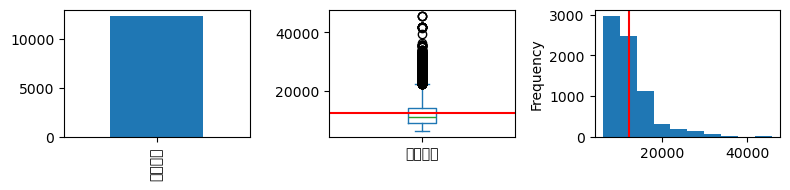

In [11]:
fig=plt.figure(figsize=(8,2))
ax1, ax2, ax3 = fig.subplots(1,3)

## ax1
m1=df_prep['분양가격'].mean() # numpy.float64
sr1=pd.Series(m1, index=['분양가격'])
sr1
sr1.plot.bar(ax=ax1)

## ax2
_=df_prep['분양가격'].plot.box(ax=ax2)
ax2.axhline(m1, color='r')

## ax3
_=df_prep['분양가격'].plot.hist(ax=ax3)
ax3.axvline(m1, color='r')

fig.tight_layout()

## 아래의 네 가지의 시각화를  수행하시오
* 1) 지역별 모든 분양가격의 평균을 bar plot 하시오 (ax1)
* 2) 지역별 모든 분양가격을 line plot 하시오 (ax1)
* 3) 지역별 모든 분양가격을 box plot (with parameter column, by) 하시오 (ax2)
* 4) 지역별 모든 분양가격을 box plot (with concat function) (ax3)

In [7]:
df_prep['분양가격'].mean() # 전체 평균 -> 1개의 값 (numpy.float64)
df_prep.groupby('지역명')['분양가격'].mean() # 지역별 평균 -> Series

12286.356104889375

지역명
강원     9297.425828
경기    14561.927742
경남    10405.949342
경북     9707.467720
광주    12075.542188
대구    13903.696053
대전    11471.316522
부산    13717.907559
서울    26305.108753
세종    10618.640409
울산    13196.176347
인천    13794.637093
전남     8728.814634
전북     8486.440347
제주    14815.404580
충남     9303.040359
충북     8391.643413
Name: 분양가격, dtype: float64

분양가격    Axes(0.125,0.511739;0.775x0.167391)
dtype: object

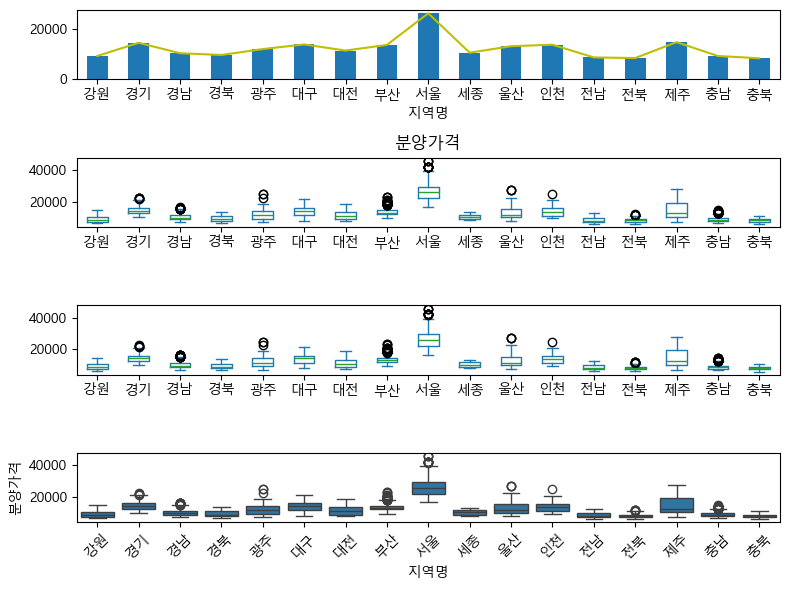

In [8]:
fig=plt.figure(figsize=(8,6), dpi=100)
ax1, ax2, ax3, ax4 = fig.subplots(4,1)

## ax1
sr1=df_prep.groupby('지역명')['분양가격'].mean()
_=sr1.plot.bar(ax=ax1)
_=sr1.plot.line(ax=ax1, color='y')

## ax2
df_prep.plot.box(column='분양가격', by='지역명', ax=ax2) # groupby 후 box plot

## ax3
df_conc=pd.DataFrame()
for n1 in sorted(df_prep['지역명'].unique()):
    sr1=df_prep.loc[df_prep['지역명']==n1, '분양가격'].reset_index(drop=True)
    sr1.name=n1
    df_conc=pd.concat([df_conc, sr1], axis=1) # index 를 기준으로 열 추가 되기 때문에 reset_index 필요
_=df_conc.plot.box(ax=ax3)

# ax4 : seaborn 을 이용해서 지역별로 정렬한 plot 그리기
import seaborn as sns
_=sns.boxplot(data=df_prep, x='지역명', y='분양가격', ax=ax4, order=sorted(df_prep['지역명'].unique()))
_=ax4.tick_params(axis='x', rotation=45)


fig.tight_layout()

## 아래의 시각화를  수행하시오
* 지역별 모든 분양가격을 histogram으로 그리시오

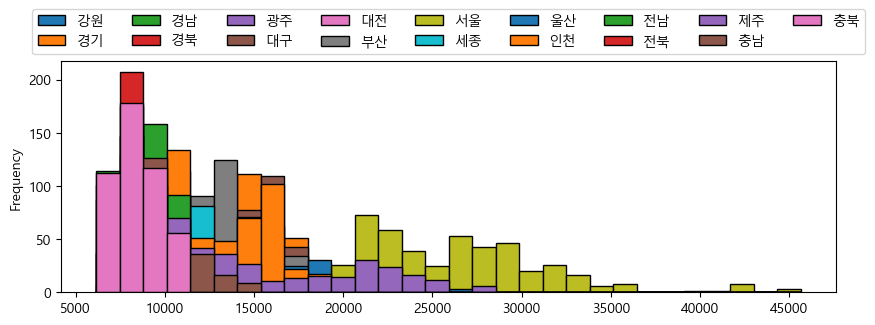

In [9]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1 = fig.subplots()

## ax1
df_conc=pd.DataFrame()
for n1 in sorted(df_prep['지역명'].unique()):
    sr1=df_prep.loc[df_prep['지역명']==n1, '분양가격'].reset_index(drop=True)
    sr1.name=n1
    df_conc=pd.concat([df_conc, sr1], axis=1)
_=df_conc.plot.hist(ax=ax1, bins=30, edgecolor='k')
_=ax1.legend(bbox_to_anchor=(0.5,1), ncol=9, loc='lower center')

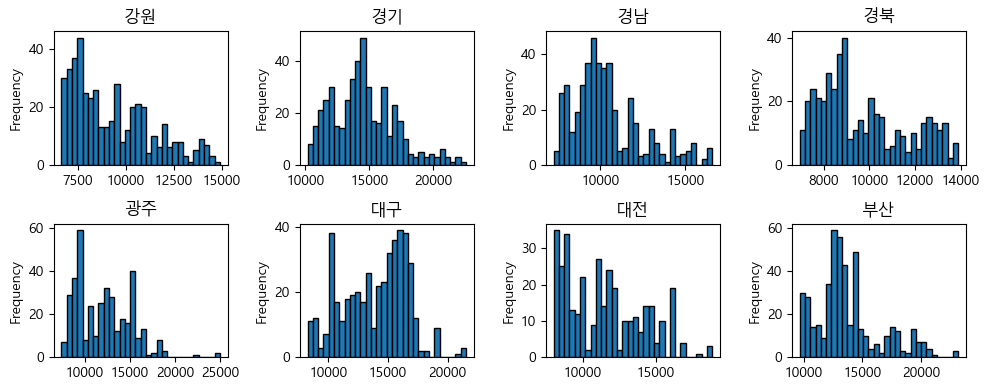

In [10]:
fig=plt.figure(figsize=(10,4), dpi=100)
axs = fig.subplots(2,4).flatten()

## ax1
df_conc=pd.DataFrame()
for n1, ax in zip(sorted(df_prep['지역명'].unique())[:8], axs):
    sr1=df_prep.loc[df_prep['지역명']==n1, '분양가격']
    _=sr1.plot.hist(ax=ax, bins=30, edgecolor='k')
    _=ax.set_title(n1)
fig.tight_layout()

## <실습1>
* 아래의 세 가지의 시각화를 각 axes에 수행하시오
* 1) 서울 경기 별 모든 평당분양가격의 평균을 bar plot 하시오
* 2) 서울 경기 별 모든 평당분양가격을 box plot 하시오
* 3) 서울 경기 별 모든 평당분양가격을 hist plot 하시오

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~
...,...,...,...,...,...
7252,경기,2023,6,19364.4,전체
7253,경기,2023,6,20869.2,~60
7254,경기,2023,6,19437.0,60~85
7255,경기,2023,6,20823.0,85~102


<Axes: xlabel='지역명'>

분양가격    Axes(0.398529,0.53;0.227941x0.35)
dtype: object

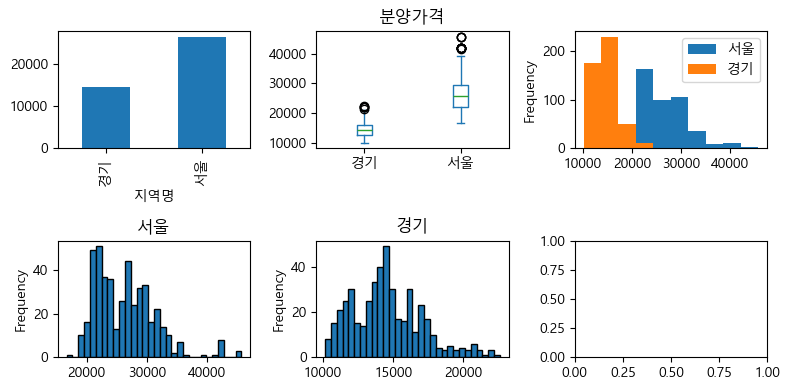

In [11]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax1, ax2, ax3, ax4, ax5, ax6 = fig.subplots(2,3).flatten()

df_prep2=df_prep.loc[df_prep['지역명'].isin(['서울','경기'])]
df_prep2

## ax1
df_prep2.groupby('지역명')['분양가격'].mean().plot.bar(ax=ax1)


## ax2
df_prep2.plot.box(column='분양가격', by='지역명', ax=ax2)

## ax3
df_conc=pd.DataFrame()
for n in ['서울', '경기']:
    sr1 = df_prep2.loc[df_prep2['지역명']==n, '분양가격']
    sr1.name=n
    df_conc=pd.concat([df_conc, sr1], axis=1)
_=df_conc.plot.hist(ax=ax3)

## ax4, ax5
for n1, ax in zip(['서울', '경기'], [ax4, ax5]):
    sr1 = df_prep2.loc[df_prep2['지역명']==n1, '분양가격']
    _=sr1.plot.hist(ax=ax, bins=30, edgecolor='k')
    _=ax.set_title(n1)

fig.tight_layout()




## 2018년 분양가격의 변동성이 가장 큰 도시 3, 가장 작은 도시 3개의 분양가격을 boxplot으로 나타내시오
* 변동성은 std함수를 사용하여 측정함

In [12]:
# isin 함수 설명
# isin 함수는 주어진 값이 시리즈 안에 있는지 확인하는 함수입니다.
# 예를 들어, 다음과 같은 시리즈가 있습니다:

sr1 = pd.Series([1,2,3,4,5])
 
# 이 시리즈에서 값 2와 4가 있는지 확인하려면 다음과 같이 사용합니다:
sr1.isin([2,4])
# 결과는 다음과 같습니다:
# 0    False
# 1     True
# 2    False
# 3     True
# 4    False


0    False
1     True
2    False
3     True
4    False
dtype: bool

['제주', '대전', '서울', '충남', '울산', '세종']

분양가격    Axes(0.125,0.11;0.352273x0.77)
dtype: object

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'Malgun Gothic' not found.
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/cor

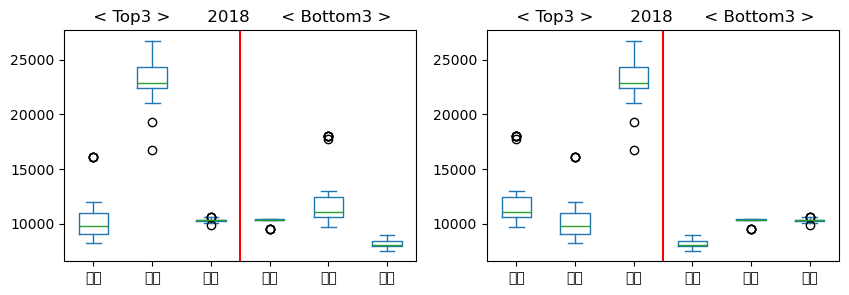

In [8]:
fig=plt.figure(figsize=(10,3))
ax1, ax2 = fig.subplots(1,2)

df_year=df_prep.loc[df_prep['연도']==2018]
sr_std=df_year.groupby('지역명')['분양가격'].std()
sr_std_srt=sr_std.sort_values(ascending=False)
city_selected=list(sr_std_srt.index[:3])+list(sr_std_srt.index[-3:])
city_selected

## 방법 1
df_selected=df_year.loc[df_year['지역명'].isin(city_selected)]
df_selected.plot.box(column='분양가격', by='지역명', ax=ax1)

_=ax1.axvline(3.5, color='r')
_=ax1.set_title(' < Top3 >       2018      < Bottom3 >') 
## 방법 2 (채택)
df_conc=pd.DataFrame()
for n1 in city_selected:
    sr1=df_year.loc[df_year['지역명']==n1, '분양가격'].reset_index(drop=True)
    sr1.name=n1
    df_conc=pd.concat([df_conc, sr1], axis=1)
_=df_conc.plot.box(ax=ax2)

_=ax2.axvline(3.5, color='r')
_=ax2.set_title(' < Top3 >       2018      < Bottom3 >') 

## <실습2>
* 2018년 중에서 평당분양가격의 변동성이 가장 큰 도시 3, 가장 작은 도시 3개의 평당분양가격을 boxplot으로 나타내시오 (ax1)
* 2023년 중에서 평당분양가격의 변동성이 가장 큰 도시 3, 가장 작은 도시 3개의 평당분양가격을 boxplot으로 나타내시오 (ax2)
* 변동성은 IQR (0.75Q - 0.25Q)로 측정함

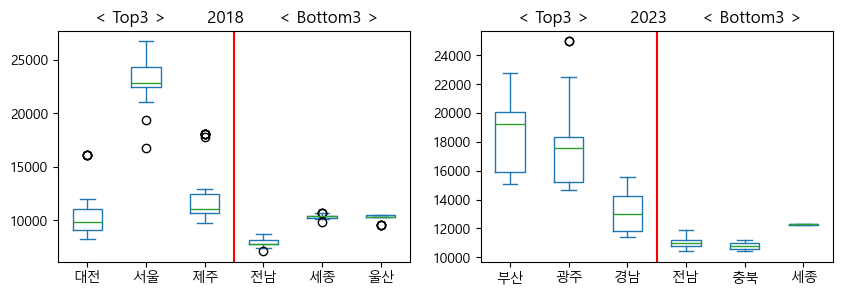

In [17]:
fig=plt.figure(figsize=(10,3))
ax1, ax2 = fig.subplots(1,2)

def get_IQR(sr1): # box 크기
    return sr1.quantile(0.75)-sr1.quantile(0.25)

def plot_box_with_std(ax, year):
    ## 코드작성
    df_year = df_prep.loc[df_prep['연도']==year]
    sr_iqr = df_year.groupby('지역명')['분양가격'].apply(get_IQR)
    sorted_sr_iqr = sr_iqr.sort_values(ascending=False)
    city_selected = list(sorted_sr_iqr.index[:3]) + list(sorted_sr_iqr.index[-3:])
    ## 방법 2 (채택)
    df_conc=pd.DataFrame()
    for n1 in city_selected:
        sr1=df_year.loc[df_year['지역명']==n1, '분양가격'].reset_index(drop=True)
        sr1.name=n1
        df_conc=pd.concat([df_conc, sr1], axis=1)
    _=df_conc.plot.box(ax=ax)
    
    _=ax.axvline(3.5, color='r')
    _=ax.set_title(' < Top3 >       {}      < Bottom3 >'.format(year)) 

plot_box_with_std(ax1, 2018)
plot_box_with_std(ax2, 2023)

# Seaborn 으로 시각화 하기

# barplot
* https://seaborn.pydata.org/generated/seaborn.barplot.html

## 분양가격의 평균

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: ylabel='분양가격'>

(12171.324592665937, 12401.18955852226, 12286.356104889375)

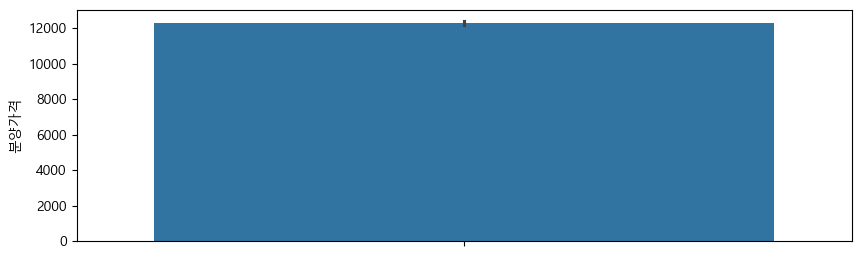

In [29]:
fig=plt.figure(figsize=(10, 3))
ax1=fig.subplots()
df_prep.head()

sns.barplot(data=df_prep, # 데이터 프레임
            y="분양가격", # y축 변수
            errorbar=('ci', 95), # errorbar 옵션 : confidence interval 95%, None일 경우 errorbar 사용 X
            estimator=np.mean, # 대표값 계산 함수, 기본값은 mean
            ax=ax1 # 그래프를 그릴 영역
)

# errorbar default: ('ci', 95)
## ci: confidence interval (bootstrap resampling with replacement)
## pi : prediction interval
## sd : standard deviation
## se : standard error
## default boot_n=1000
# estimator default: mean


## confidence interval 구하는 방법
boots=[]
for ii in range(1000):
    boot1=df_prep["분양가격"].sample(len(df_prep["분양가격"]), replace=True).mean()
    boots.append(boot1)
ci_lower, ci_upper = np.percentile(boots, [2.5, 97.5])

ci_lower, ci_upper, df_prep["분양가격"].mean()

95% 신뢰구간: (43.84, 55.40)


<Figure size 800x400 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Bootstrap 샘플링 분포')

Text(0.5, 0, '평균값')

Text(0, 0.5, '빈도')

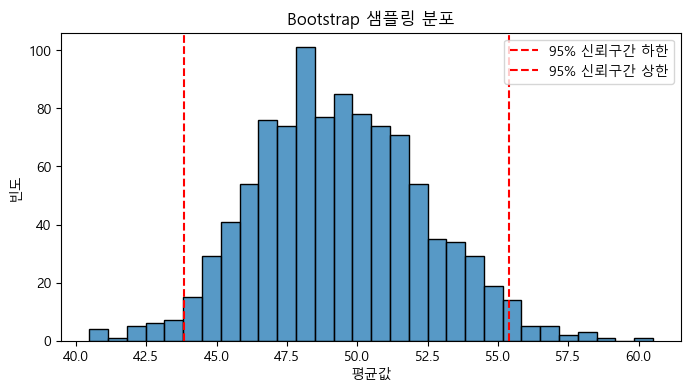

In [30]:
# bootstrap 예시 : 신뢰구간 계산
ar1 = np.arange(100)  # 0부터 99까지의 배열 생성
sr1 = pd.Series(ar1)  # pandas Series로 변환

# bootstrap 샘플링으로 신뢰구간 계산
boots = []
for ii in range(1000):  # 1000번 반복
    sample = sr1.sample(n=len(sr1), replace=True)  # 복원추출
    boots.append(sample.mean())

# 신뢰구간 계산 (95% 신뢰구간)
ci_lower = np.percentile(boots, 2.5)
ci_upper = np.percentile(boots, 97.5)
print(f"95% 신뢰구간: ({ci_lower:.2f}, {ci_upper:.2f})")

# 샘플링 분포 시각화
plt.figure(figsize=(8, 4))
sns.histplot(boots, bins=30)
plt.axvline(x=ci_lower, color='r', linestyle='--', label='95% 신뢰구간 하한')
plt.axvline(x=ci_upper, color='r', linestyle='--', label='95% 신뢰구간 상한')
plt.title('Bootstrap 샘플링 분포')
plt.xlabel('평균값')
plt.ylabel('빈도')
plt.legend()
plt.show()

## 지역별 분양가격의 평균

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='지역명', ylabel='분양가격'>

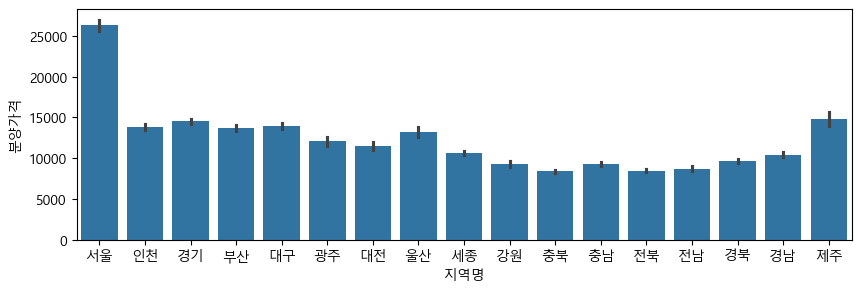

In [31]:
fig=plt.figure(figsize=(10, 3))
ax1=fig.subplots()
df_prep.head()

sns.barplot(data=df_prep, x="지역명", y="분양가격", errorbar=('ci',100), ax=ax1)

## 지역별 분양가격의 최대값

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


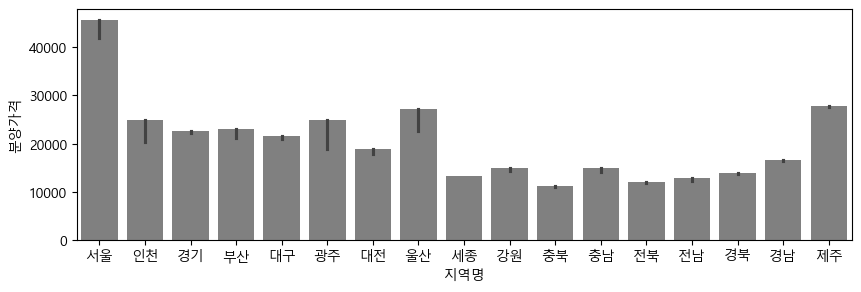

In [32]:
fig=plt.figure(figsize=(10, 3))
ax1=fig.subplots()
df_prep.head()

_=sns.barplot(data=df_prep, x="지역명",
              color='gray', # color 설정
              y="분양가격",
              estimator='max', #estimator=np.max
            #   errorbar=None, # errorbar 사용 X
              ax=ax1) 

## 지역별 분양가격의 중앙값

<Figure size 1000x300 with 0 Axes>

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='지역명', ylabel='분양가격'>

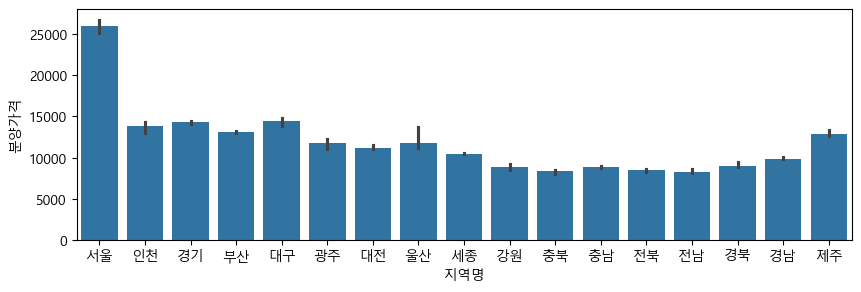

In [33]:
plt.figure(figsize=(10, 3))
df_prep.head()

sns.barplot(data=df_prep, x="지역명",
            y="분양가격",
            estimator=np.median) # pi: percentile

## <실습3> barplot (seaborn vs pandas)
* 아래와 같이 seaborn과 pandas plot을 각각 사용하여 연도별 분양가격의 평균을 시각화 하시오

<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도'>

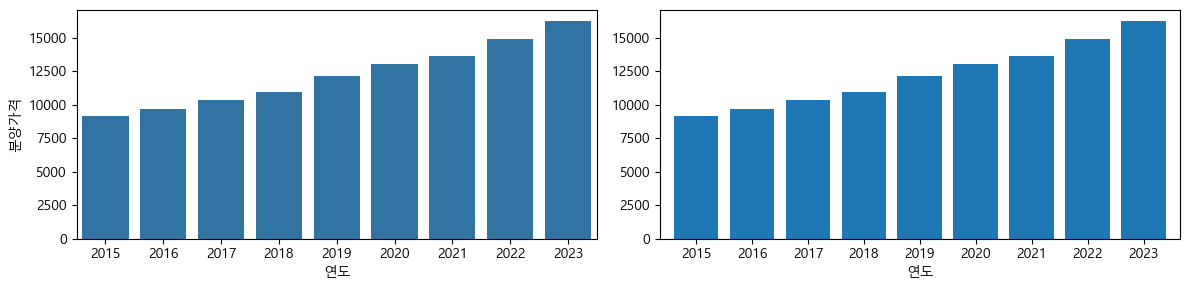

In [34]:
fig=plt.figure(figsize=(12,3), dpi=100) # 액자설정
ax1, ax2=fig.subplots(1,2) # 도화지설정

## ax1: seaborn
sns.barplot(data=df_prep, x="연도", y="분양가격", ax=ax1, order=sorted(df_prep['연도'].unique()), errorbar=None)

## ax2: pandas
df1=df_prep.groupby('연도')['분양가격'].mean() # group by 하면서 정렬이 됨
df1.plot.bar(rot=0, ax=ax2, width=0.8) # rot : default 90

fig.tight_layout()

# barplot errorbar 추가해보기

## barplot (errorbar: pi)

<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도', ylabel='분양가격'>

,up,lw
연도,,
2015,10652.07,7081.470
2016,11170.50,7164.300
2017,12619.20,7428.300
2018,13355.76,7922.310
2019,14672.13,8230.200
2020,15424.53,8709.195
2021,16067.70,9274.980
2022,19027.47,10446.810
2023,21797.82,11059.290


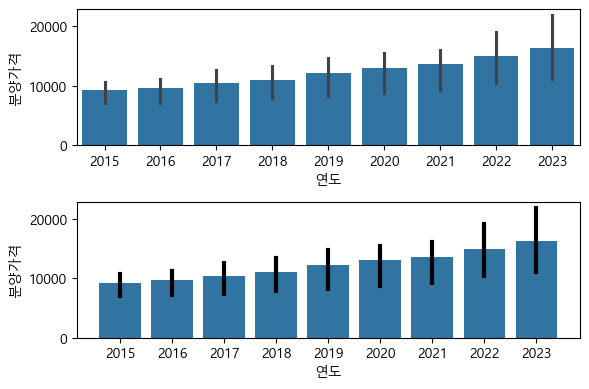

In [38]:
fig=plt.figure(figsize=(6, 4))
ax1, ax2=fig.subplots(2,1)

## ax1 (errorbar by parameter)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=('pi',70), # Percentile interval: 15 ~ 85 
            ax=ax1)

## ax2 (errorbar by yourself)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=None,
            ax=ax2)

def get_errorbar_pi(sr1):
    upper=sr1.quantile(0.85)
    lower=sr1.quantile(0.15)
    return pd.Series([upper, lower], index=['up','lw'])

pi_res=df_prep.groupby('연도')['분양가격'].apply(get_errorbar_pi)
# pi_res : MultiIndex ('연도', 'up/lw')
pi_res=pi_res.unstack(1)
pi_res

## draw errorbar
for x_pos, ind in zip(ax2.get_xticks(), pi_res.index):
    up_pos=pi_res.loc[ind, 'up']
    lw_pos=pi_res.loc[ind, 'lw']
    
    _=ax2.plot([x_pos,x_pos],[lw_pos, up_pos], color='k', linewidth=3)
    
fig.tight_layout()

## <실습4> barplot (errorbar: sd)

## <실습4-1> barplot (errorbar: ci)

<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도', ylabel='분양가격'>

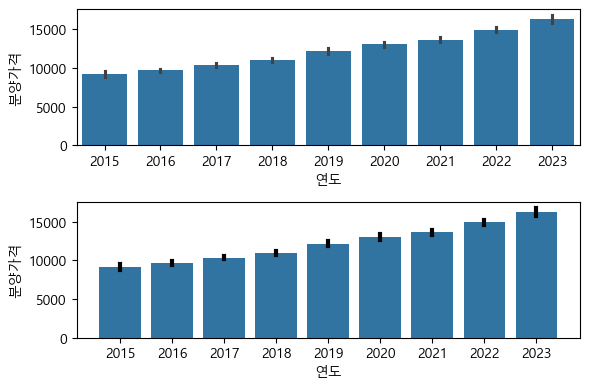

In [43]:
fig=plt.figure(figsize=(6, 4))
ax1, ax2=fig.subplots(2,1)

## ax1 (errorbar by parameter)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=('ci',95),
            ax=ax1)

## ax2 (errorbar by yourself)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=None,
            ax=ax2)

## 코드작성
def get_errorbar_ci(sr1):
    boot = []
    for _ in range(1000):
        mean = sr1.sample(len(sr1), replace=True).mean()
        boot.append(mean)
    upper, lower = np.percentile(boot, [97.5, 2.5])
    return pd.Series([upper, lower], index=['up','lw'])

sd_res = df_prep.groupby('연도')['분양가격'].apply(get_errorbar_ci)
sd_res = sd_res.unstack(1)

## draw errorbar
for x_pos, ind in zip(ax2.get_xticks(), sd_res.index):
    up_pos=sd_res.loc[ind, 'up']
    lw_pos=sd_res.loc[ind, 'lw']
    
    _=ax2.plot([x_pos,x_pos],[lw_pos, up_pos], color='k', linewidth=3)
    
fig.tight_layout()

# barplot with hue

## 지역별 연도별 평당분양가격의 평균

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

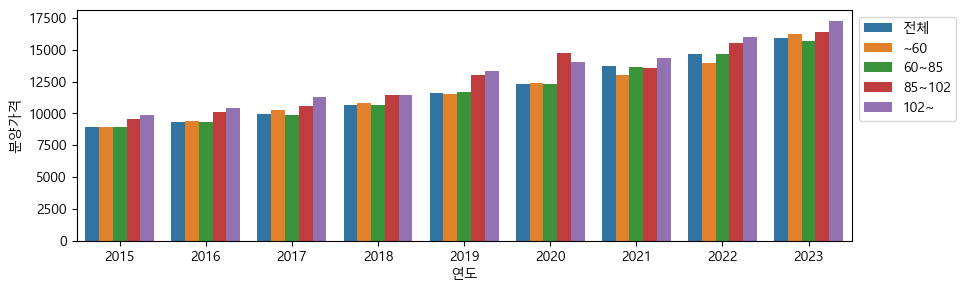

In [44]:
fig=plt.figure(figsize=(10, 3))
ax1=fig.subplots()
df_prep.head()

sns.barplot(data=df_prep, x="연도", y="분양가격", hue='전용면적',ax=ax1, errorbar=None) # ci=None
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

## <실습5>
* ax1과 같은 결과를 pandas plot을 활용하여 ax2에 그리시오

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도'>

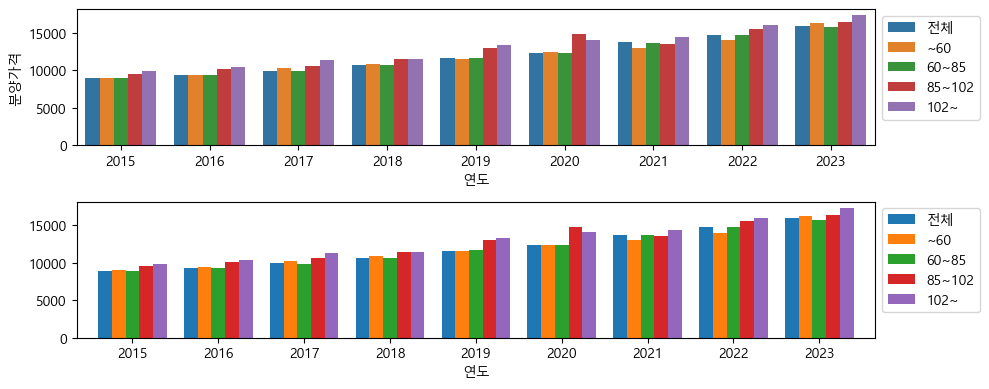

In [58]:
fig=plt.figure(figsize=(10, 4))
ax1, ax2=fig.subplots(2,1)
df_prep.head()

sns.barplot(data=df_prep, x="연도", y="분양가격", hue='전용면적',ax=ax1, errorbar=None) # hueorder = [...]
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

## 코드작성
df_res = df_prep.groupby(['연도','전용면적'])['분양가격'].mean().unstack(1)
df_res = df_prep.pivot_table(index='연도', columns='전용면적', values='분양가격', aggfunc='mean')
df_res = df_res[['전체','~60','60~85','85~102','102~']] # column 재배치
df_res.plot.bar(ax=ax2, rot=0, width=0.8)
ax2.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.tight_layout()

# === 실습풀이 ===

## <실습1>
* 아래의 세 가지의 시각화를 각 axes에 수행하시오
* 1) 서울 경기 별 모든 평당분양가격의 평균을 bar plot 하시오
* 2) 서울 경기 별 모든 평당분양가격을 box plot 하시오
* 3) 서울 경기 별 모든 평당분양가격을 hist plot 하시오

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~
...,...,...,...,...,...
7252,경기,2023,6,19364.4,전체
7253,경기,2023,6,20869.2,~60
7254,경기,2023,6,19437.0,60~85
7255,경기,2023,6,20823.0,85~102


분양가격    Axes(0.398529,0.53;0.227941x0.35)
dtype: object

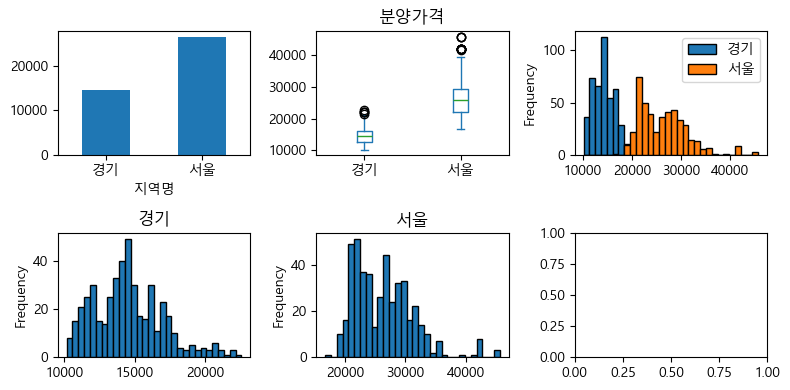

In [7]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax1, ax2, ax3, ax4, ax5, ax6 = fig.subplots(2,3).flatten()

df_prep2=df_prep.loc[df_prep['지역명'].isin(['서울','경기'])]
df_prep2

## ax1
sr1=df_prep2.groupby('지역명')['분양가격'].mean()
_=sr1.plot.bar(ax=ax1, rot=0)

## ax2
df_prep2.plot.box(column='분양가격', by='지역명', ax=ax2)

## ax3
df_conc=pd.DataFrame()
for n1 in sorted(df_prep2['지역명'].unique()):
    sr1=df_prep2.loc[df_prep2['지역명']==n1, '분양가격'].reset_index(drop=True)
    sr1.name=n1
    df_conc=pd.concat([df_conc, sr1], axis=1)
_=df_conc.plot.hist(ax=ax3, bins=30, edgecolor='k')

## ax4, ax5
df_conc=pd.DataFrame()
for n1, ax in zip(sorted(df_prep2['지역명'].unique()), [ax4,ax5]):
    sr1=df_prep.loc[df_prep['지역명']==n1, '분양가격']
    _=sr1.plot.hist(ax=ax, bins=30, edgecolor='k')
    _=ax.set_title(n1)
    
fig.tight_layout()




## <실습2>
* 2018년 중에서 평당분양가격의 변동성이 가장 큰 도시 3, 가장 작은 도시 3개의 평당분양가격을 boxplot으로 나타내시오 (ax1)
* 2023년 중에서 평당분양가격의 변동성이 가장 큰 도시 3, 가장 작은 도시 3개의 평당분양가격을 boxplot으로 나타내시오 (ax2)
* 변동성은 IQR (0.75Q - 0.25Q)로 측정함

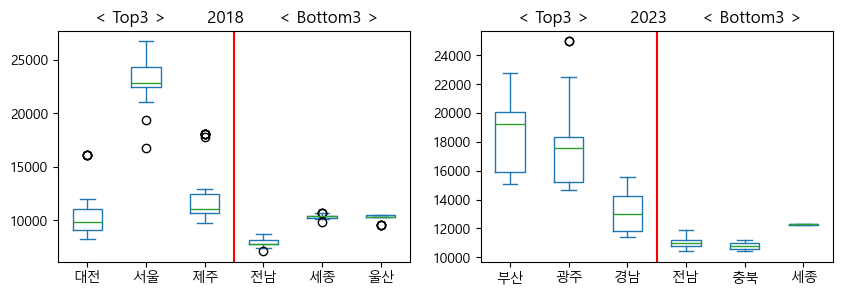

In [9]:
fig=plt.figure(figsize=(10,3))
ax1, ax2 = fig.subplots(1,2)

def get_IQR(sr1):
    return sr1.quantile(0.75)-sr1.quantile(0.25)

def plot_box_with_std(ax, year):
    df_year=df_prep.loc[df_prep['연도']==year]
    sr_std=df_year.groupby('지역명')['분양가격'].apply(get_IQR)
    sr_std_srt=sr_std.sort_values(ascending=False)
    city_selected=list(sr_std_srt.index[:3])+list(sr_std_srt.index[-3:])
    city_selected

    ## 방법 2 (채택)
    df_conc=pd.DataFrame()
    for n1 in city_selected:
        sr1=df_year.loc[df_year['지역명']==n1, '분양가격'].reset_index(drop=True)
        sr1.name=n1
        df_conc=pd.concat([df_conc, sr1], axis=1)
    _=df_conc.plot.box(ax=ax)
    
    _=ax.axvline(3.5, color='r')
    _=ax.set_title(' < Top3 >       {}      < Bottom3 >'.format(year)) 

plot_box_with_std(ax1, 2018)
plot_box_with_std(ax2, 2023)

## <실습3> barplot (seaborn vs pandas)
* 아래와 같이 seaborn과 pandas plot을 각각 사용하여 연도별 분양가격의 평균을 시각화 하시오

<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도'>

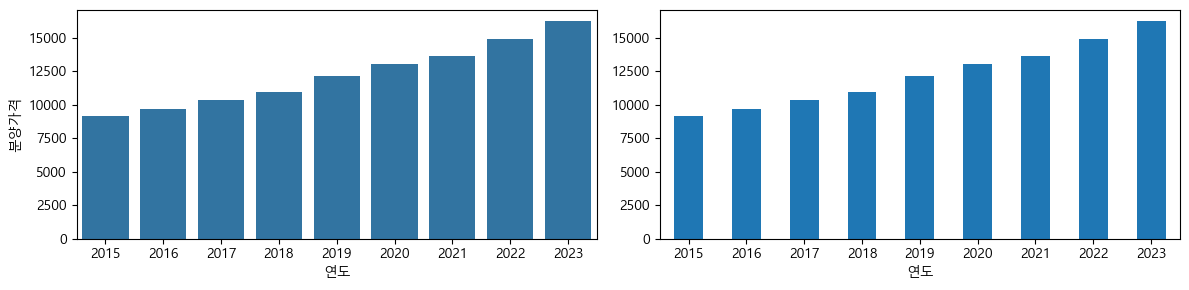

In [22]:
fig=plt.figure(figsize=(12,3), dpi=100) # 액자설정
ax1, ax2=fig.subplots(1,2) # 도화지설정

## ax1: seaborn
sns.barplot(data=df_prep, x="연도", y="분양가격", errorbar=None, ax=ax1)

## ax2: pandas
df1=df_prep.groupby('연도')['분양가격'].mean()
df1.plot.bar(rot=0, ax=ax2)

fig.tight_layout()

## <실습4> barplot (errorbar: sd)

<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도', ylabel='분양가격'>

,up,lw
연도,,
2015,12426.377704,5979.093901
2016,13218.782150,6147.267850
2017,14037.630636,6708.227210
2018,14893.038180,7064.838643
2019,17346.871461,7029.714723
2020,18427.493315,7651.351583
2021,18809.404195,8462.640884
2022,19964.229255,9920.779734
2023,21826.189108,10728.017103


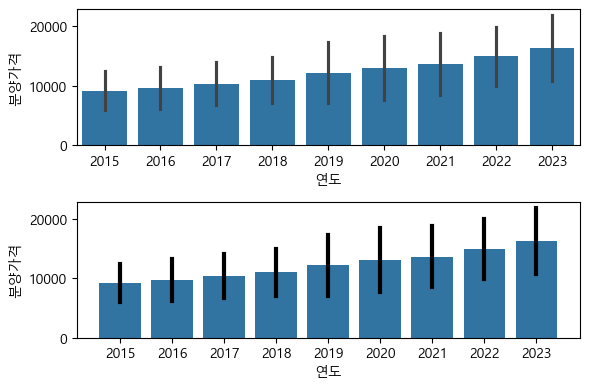

In [16]:
fig=plt.figure(figsize=(6, 4))
ax1, ax2=fig.subplots(2,1)

## ax1 (errorbar by parameter)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=('sd',1), # standard deviation interval: -1*Sd ~ +1*sd 
            ax=ax1)

## ax2 (errorbar by yourself)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=None,
            ax=ax2)

def get_errorbar_sd(sr1):
    upper=sr1.mean()+sr1.std()
    lower=sr1.mean()-sr1.std()
    return pd.Series([upper, lower], index=['up','lw'])

sd_res=df_prep.groupby('연도')['분양가격'].apply(get_errorbar_sd)
sd_res=sd_res.unstack(1)
sd_res


## draw errorbar
for x_pos, ind in zip(ax2.get_xticks(), sd_res.index):
    up_pos=sd_res.loc[ind, 'up']
    lw_pos=sd_res.loc[ind, 'lw']
    
    _=ax2.plot([x_pos,x_pos],[lw_pos, up_pos], color='k', linewidth=3)
    
fig.tight_layout()

## <실습5>
* ax1과 같은 결과를 pandas plot을 활용하여 ax2에 그리시오

,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<Axes: xlabel='연도', ylabel='분양가격'>

전용면적,전체,~60,60~85,85~102,102~
연도,,,,,
2015,8893.047059,8951.525000,8891.817647,9518.506250,9837.226667
2016,9293.042647,9398.876119,9295.986765,10122.355435,10388.728272
2017,9927.322059,10271.375635,9840.438235,10573.447977,11311.244162
2018,10675.825123,10844.409783,10650.611823,11441.707895,11445.574576
2019,11602.715816,11506.803371,11677.201531,12980.676923,13331.520968
2020,12317.716667,12400.844211,12327.480000,14759.608696,14068.432919
2021,13706.889706,12983.757868,13644.416176,13532.067470,14380.755172
2022,14690.338235,13948.000000,14695.175000,15523.450877,15990.638265
2023,15918.585294,16230.661765,15673.317647,16378.463415,17272.686316


<Axes: xlabel='연도'>

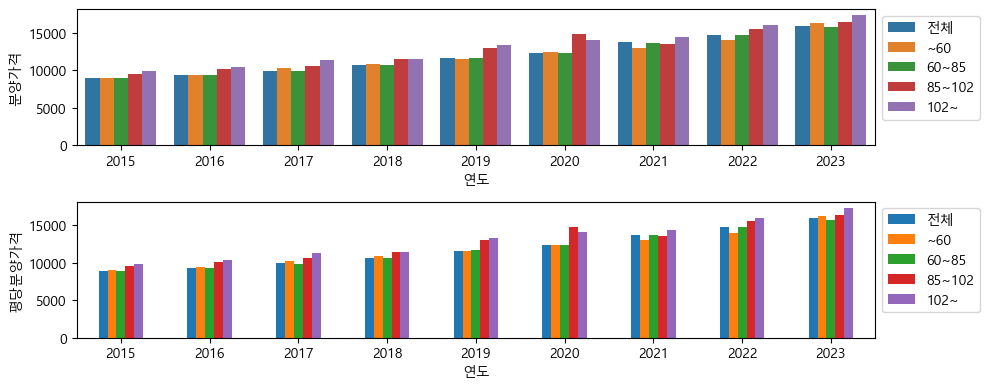

In [24]:
fig=plt.figure(figsize=(10, 4))
ax1, ax2=fig.subplots(2,1)
df_prep.head()

sns.barplot(data=df_prep, x="연도", y="분양가격", hue='전용면적',ax=ax1, errorbar=None) # ci=None
ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

## 코드작성
df2=df_prep.pivot_table(index='연도',columns='전용면적',values='분양가격')
df2=df2[['전체','~60','60~85','85~102','102~']]
df2
df2.plot.bar(rot=0, ax=ax2)

_=ax2.set_ylabel('평당분양가격')
ax2.legend(bbox_to_anchor=(1,1), loc='upper left')
## 코드작성 끝

fig.tight_layout()